# Analysis of Effects from Artilces of Posts

In [33]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
#set format to float with 4 decimals
pd.set_option('display.float_format', '{:.4f}'.format)

Load, specify and visualize data for analysis

In [35]:
#read data
test_stats = pd.read_csv("test_stats.csv")
desc_stats = pd.read_csv("descriptive_stats.csv")
boot_stats = pd.read_csv('bootstrap_stats.csv')

#emotions of articles(_A) and posts(_P) included in the analysis 
emotions_a = ['Anger_A', 'Fear_A', 'Disgust_A', 'Sadness_A', 'Joy_A', 'None_A']
emotions_p = ['Anger_P', 'Fear_P', 'Disgust_P', 'Sadness_P', 'Joy_P', 'None_P']

conditions = [
    (test_stats['signif_label'] == 'yes') & (test_stats['signif_prob'] >= 0.95),
    (
        ((test_stats['signif_label'] == 'yes') & (test_stats['signif_prob'] < 0.95)) |
        ((test_stats['signif_label'] == 'no') & (test_stats['signif_prob'] >= 0.95))
    )
]

choices = ['high', 'low']

test_stats['significance'] = np.select(conditions, choices, default='none')

test_stats = test_stats[['predictor', 'criterion', 'significance', 'mean_k', 'H_mean', 'epsilon2_mean', 'epsilon2_ci_lower', 'epsilon2_ci_upper']]

C:\Users\morit\AppData\Local\Temp\ipykernel_13160\3809901056.py:4: DtypeWarning:

Columns (1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.



Test Results by emotions of posts

In [36]:
anger = test_stats[test_stats['criterion'] == 'Anger_P']
anger

,predictor,criterion,significance,mean_k,H_mean,epsilon2_mean,epsilon2_ci_lower,epsilon2_ci_upper
0,Anger_A,Anger_P,high,4.0000,1400.6313,0.0056,0.0050,0.0062
1,Fear_A,Anger_P,high,4.0000,231.5153,0.0009,0.0007,0.0012
2,Disgust_A,Anger_P,none,4.0000,4.4714,0.0000,-0.0000,0.0000
3,Sadness_A,Anger_P,high,4.0000,453.3716,0.0018,0.0015,0.0021
4,Joy_A,Anger_P,high,4.0000,173.4739,0.0007,0.0005,0.0009
5,None_A,Anger_P,high,4.0000,257.3777,0.0010,0.0008,0.0013
6,NewsroomTopic,Anger_P,high,9.0000,2942.0412,0.0117,0.0109,0.0126


In [37]:
fear = test_stats[test_stats['criterion'] == 'Fear_P']
fear

,predictor,criterion,significance,mean_k,H_mean,epsilon2_mean,epsilon2_ci_lower,epsilon2_ci_upper
7,Anger_A,Fear_P,high,4.0000,438.6456,0.0017,0.0014,0.0021
8,Fear_A,Fear_P,high,4.0000,5052.3756,0.0202,0.0191,0.0214
9,Disgust_A,Fear_P,high,4.0000,35.3282,0.0001,0.0000,0.0002
10,Sadness_A,Fear_P,high,4.0000,1049.8107,0.0042,0.0037,0.0047
11,Joy_A,Fear_P,high,4.0000,762.6200,0.0030,0.0026,0.0035
12,None_A,Fear_P,high,4.0000,3976.8247,0.0159,0.0149,0.0169
13,NewsroomTopic,Fear_P,high,9.0000,7553.6070,0.0302,0.0288,0.0315


In [38]:
disgust = test_stats[test_stats['criterion'] == 'Disgust_P']
disgust

,predictor,criterion,significance,mean_k,H_mean,epsilon2_mean,epsilon2_ci_lower,epsilon2_ci_upper
14,Anger_A,Disgust_P,high,4.0000,590.1513,0.0023,0.0020,0.0027
15,Fear_A,Disgust_P,high,4.0000,631.5785,0.0025,0.0021,0.0029
16,Disgust_A,Disgust_P,high,4.0000,480.1966,0.0019,0.0015,0.0023
17,Sadness_A,Disgust_P,high,4.0000,231.1799,0.0009,0.0007,0.0012
18,Joy_A,Disgust_P,high,4.0000,35.3113,0.0001,0.0000,0.0002
19,None_A,Disgust_P,high,4.0000,127.0416,0.0005,0.0003,0.0007
20,NewsroomTopic,Disgust_P,high,9.0000,2038.8059,0.0081,0.0074,0.0088


In [39]:
sadness = test_stats[test_stats['criterion'] == 'Sadness_P']
sadness

,predictor,criterion,significance,mean_k,H_mean,epsilon2_mean,epsilon2_ci_lower,epsilon2_ci_upper
21,Anger_A,Sadness_P,high,4.0000,50.9159,0.0002,0.0001,0.0003
22,Fear_A,Sadness_P,high,4.0000,1990.3076,0.0079,0.0073,0.0087
23,Disgust_A,Sadness_P,high,4.0000,75.2087,0.0003,0.0002,0.0004
24,Sadness_A,Sadness_P,high,4.0000,1024.1870,0.0041,0.0036,0.0046
25,Joy_A,Sadness_P,high,4.0000,267.0340,0.0011,0.0008,0.0013
26,None_A,Sadness_P,high,4.0000,1865.8763,0.0075,0.0068,0.0082
27,NewsroomTopic,Sadness_P,high,9.0000,4185.0320,0.0167,0.0157,0.0177


In [40]:
joy = test_stats[test_stats['criterion'] == 'Joy_P']
joy

,predictor,criterion,significance,mean_k,H_mean,epsilon2_mean,epsilon2_ci_lower,epsilon2_ci_upper
28,Anger_A,Joy_P,high,4.0000,38.3724,0.0001,0.0001,0.0002
29,Fear_A,Joy_P,high,4.0000,4700.4951,0.0188,0.0177,0.0199
30,Disgust_A,Joy_P,low,4.0000,15.4764,0.0000,0.0000,0.0001
31,Sadness_A,Joy_P,high,4.0000,1087.2196,0.0043,0.0038,0.0049
32,Joy_A,Joy_P,high,4.0000,1062.4209,0.0042,0.0037,0.0048
33,None_A,Joy_P,high,4.0000,5134.6768,0.0205,0.0194,0.0216
34,NewsroomTopic,Joy_P,high,9.0000,10712.9371,0.0428,0.0412,0.0444


In [41]:
none = test_stats[test_stats['criterion'] == 'None_P']
none

,predictor,criterion,significance,mean_k,H_mean,epsilon2_mean,epsilon2_ci_lower,epsilon2_ci_upper
35,Anger_A,None_P,high,4.0000,40.9466,0.0002,0.0001,0.0003
36,Fear_A,None_P,high,4.0000,1865.7675,0.0075,0.0068,0.0081
37,Disgust_A,None_P,none,4.0000,10.6821,0.0000,-0.0000,0.0001
38,Sadness_A,None_P,high,4.0000,93.9574,0.0004,0.0002,0.0005
39,Joy_A,None_P,high,4.0000,167.8982,0.0007,0.0005,0.0009
40,None_A,None_P,high,4.0000,2386.7865,0.0095,0.0088,0.0103
41,NewsroomTopic,None_P,high,9.0000,2645.3646,0.0106,0.0098,0.0114


Plots

In [42]:
def plot_test_stats(group_by="dependent"):

    filtered_stats = test_stats

    mean_col = "epsilon2_mean"
    ci_lower_col = "epsilon2_ci_lower"
    ci_upper_col = "epsilon2_ci_upper"
    y_label = "Kruskal-Wallis Epsilon²"

    palette = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A',
               '#19D3F3', '#FF6692', '#B6E880', '#FF97FF']

    if group_by == "dependent":
        predictor_order = (
            filtered_stats.groupby('predictor')[mean_col]
            .mean().sort_values(ascending=False).index
        )
        criteria = (
            filtered_stats.groupby('criterion')[mean_col]
            .mean().sort_values(ascending=False).index
        )

        n_pred = len(predictor_order)
        total_width = 0.8
        bar_width = total_width / n_pred
        fig = go.Figure()

        for i, pred in enumerate(predictor_order):
            color = palette[i % len(palette)]
            x_positions, y_values, error_y_lower, error_y_upper, hover_texts = [], [], [], [], []

            for j, crit in enumerate(criteria):
                row = filtered_stats[
                    (filtered_stats['predictor'] == pred) &
                    (filtered_stats['criterion'] == crit)
                ]

                if row.empty:
                    y, lower, upper, 0, 0, np.nan
                    ci_text = "NA"
                else:
                    y = row[mean_col].values[0]
                    lower = y - row[ci_lower_col].values[0]
                    upper = row[ci_upper_col].values[0] - y
                    ci_text = f"[{row[ci_lower_col].values[0]:.3f}, {row[ci_upper_col].values[0]:.3f}]"

                x = j - total_width/2 + i*bar_width + bar_width/2
                x_positions.append(x)
                y_values.append(y)
                error_y_lower.append(lower)
                error_y_upper.append(upper)

                hover_texts.append(
                    f"<b>Predictor:</b> {pred}<br>"
                    f"<b>Criterion:</b> {crit}<br>"
                    f"<b>epsilon2:</b> {y:.3f}<br>"
                    f"<b>CI:</b> {ci_text}<br>"
                )

            fig.add_trace(go.Bar(
                x=x_positions,
                y=y_values,
                name=pred,
                marker_color=color,
                width=bar_width * 0.95,
                error_y=dict(
                    type='data',
                    symmetric=False,
                    array=error_y_upper,
                    arrayminus=error_y_lower,
                    color='black',
                    thickness=1.5,
                    width=5
                ),
                hovertext=hover_texts,
                hoverinfo="text"
            ))

        fig.update_layout(
            xaxis=dict(
                tickmode='array',
                tickvals=np.arange(len(criteria)),
                ticktext=criteria,
                title="Dependent Variable"
            ),
            yaxis=dict(title=y_label),
            barmode='group',
            title=f"Effects by Criterion (epsilon2)",
            legend_title_text="Predictor",
            width=1000,
            height=600
        )

    elif group_by == "predictor":
        predictor_order = (
            filtered_stats.groupby('predictor')[mean_col]
            .mean().sort_values(ascending=False).index
        )
        criteria = (
            filtered_stats.groupby('criterion')[mean_col]
            .mean().sort_values(ascending=False).index
        )

        n_crit = len(criteria)
        total_width = 0.8
        bar_width = total_width / n_crit
        fig = go.Figure()

        for j, crit in enumerate(criteria):
            color = palette[j % len(palette)]
            x_positions, y_values, error_y_lower, error_y_upper, hover_texts = [], [], [], [], []

            for i, pred in enumerate(predictor_order):
                row = filtered_stats[
                    (filtered_stats['predictor'] == pred) &
                    (filtered_stats['criterion'] == crit)
                ]

                if row.empty:
                    y, lower, upper, 0, 0, np.nan
                    ci_text = "NA"
                else:
                    y = row[mean_col].values[0]
                    lower = y - row[ci_lower_col].values[0]
                    upper = row[ci_upper_col].values[0] - y
                    ci_text = f"[{row[ci_lower_col].values[0]:.3f}, {row[ci_upper_col].values[0]:.3f}]"

                x = i - total_width/2 + j*bar_width + bar_width/2
                x_positions.append(x)
                y_values.append(y)
                error_y_lower.append(lower)
                error_y_upper.append(upper)

                hover_texts.append(
                    f"<b>Predictor:</b> {pred}<br>"
                    f"<b>Criterion:</b> {crit}<br>"
                    f"<b>epsilon2:</b> {y:.3f}<br>"
                    f"<b>CI:</b> {ci_text}<br>"
                )

            fig.add_trace(go.Bar(
                x=x_positions,
                y=y_values,
                name=crit,
                marker_color=color,
                width=bar_width * 0.9,
                error_y=dict(
                    type='data',
                    symmetric=False,
                    array=error_y_upper,
                    arrayminus=error_y_lower,
                    color='black',
                    thickness=1.5,
                    width=5
                ),
                hovertext=hover_texts,
                hoverinfo="text"
            ))

        fig.update_layout(
            xaxis=dict(
                tickmode='array',
                tickvals=list(range(len(predictor_order))),
                ticktext=list(predictor_order),
                title="Predictor"
            ),
            yaxis=dict(title=y_label),
            barmode='group',
            title=f"Effects by Predictor (epsilon2)",
            legend_title_text="Criterion",
            width=1000,
            height=600
        )

    else:
        raise ValueError("group_by must be 'dependent' or 'predictor'")

    fig.show()

In [43]:
plot_test_stats(group_by="dependent")
plot_test_stats(group_by="predictor")

In [44]:
def plot_bootstrap_distribution(
    stat_type="epsilon",
    criterion=None,
    predictor=None,
    variable=None,
    topic=None,
    bins=100,
    figsize=(8,5)):

    df = boot_stats.copy()
    
    df = df[df["stat_type"] == stat_type]
    
    if criterion is not None:
        df = df[df.get("criterion") == criterion]
    if predictor is not None:
        df = df[df.get("predictor") == predictor]
        
    if stat_type == "mean":
        if variable is None:
            raise ValueError("For stat_type='mean', 'variable' must be specified.")
        df = df[df.get("variable") == variable]
        if topic is not None:
            df = df[df.get("topic") == topic]
    
    if df.empty:
        print("No data available for the given filters.")
        return
    
    values = df["value"]
    
    plt.figure(figsize=figsize)
    sns.histplot(values, bins=bins, kde=True, color="skyblue")
    plt.xlabel(stat_type if stat_type != "mean" else f"Mean {variable}")
    plt.ylabel("Frequency")
    plt.title(f"Bootstrap Distribution of {stat_type if stat_type != 'mean' else f'Mean {variable}'}")
    
    mean_val = values.mean()
    ci_lower = values.quantile(0.025)
    ci_upper = values.quantile(0.975)
    
    plt.axvline(mean_val, color="red", linestyle="--", label=f"Mean: {mean_val:.3f}")
    plt.axvline(ci_lower, color="green", linestyle=":", label=f"2.5% CI: {ci_lower:.3f}")
    plt.axvline(ci_upper, color="green", linestyle=":", label=f"97.5% CI: {ci_upper:.3f}")
    plt.legend()
    plt.tight_layout()
    plt.show()

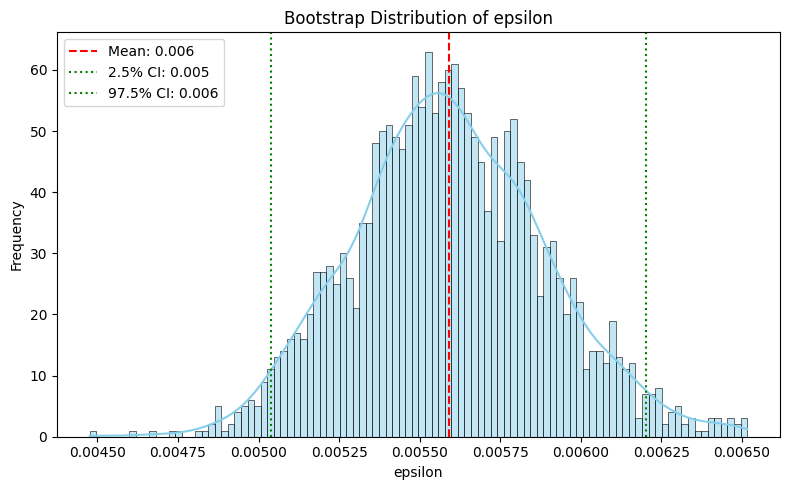

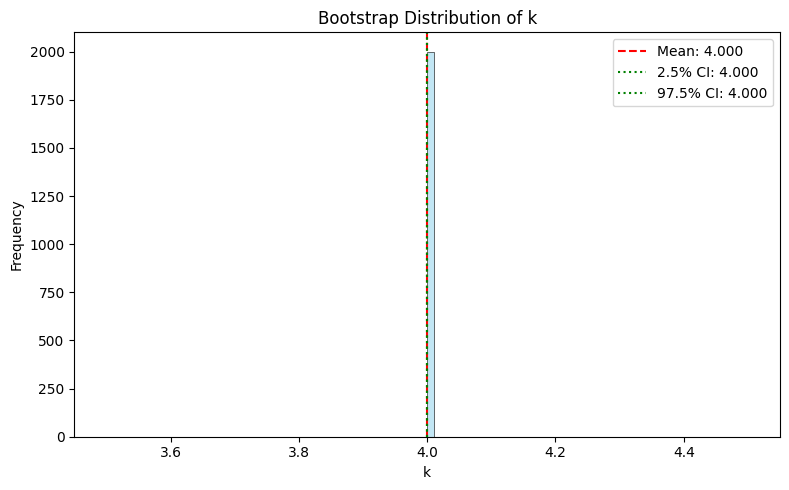

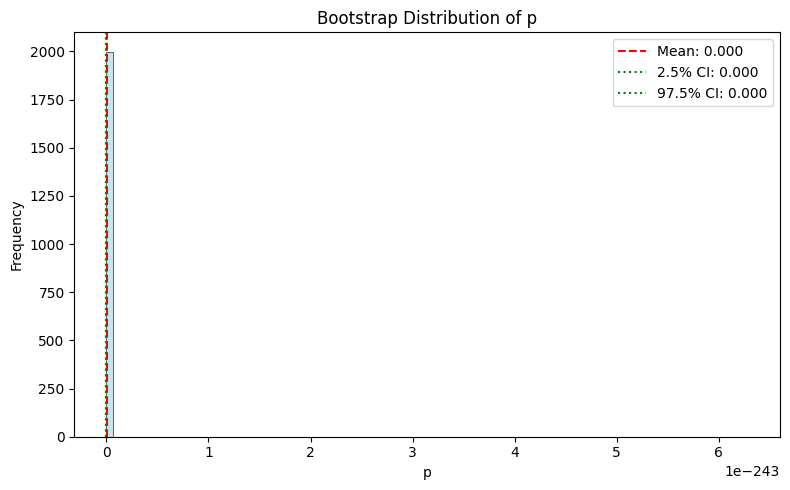

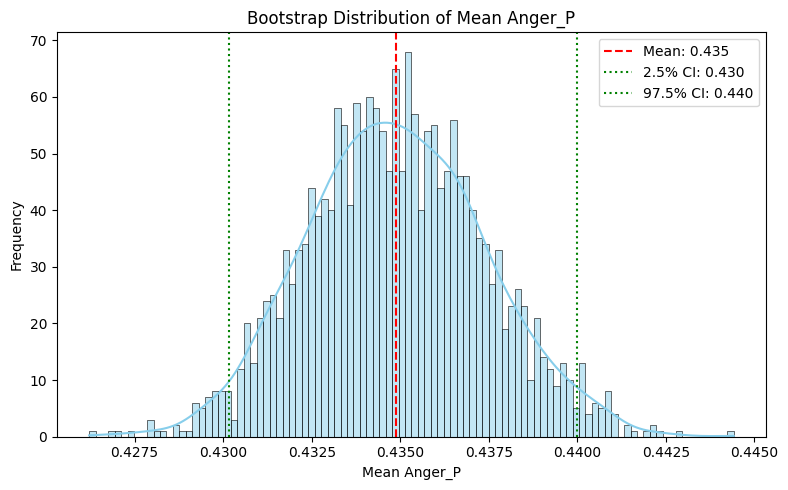

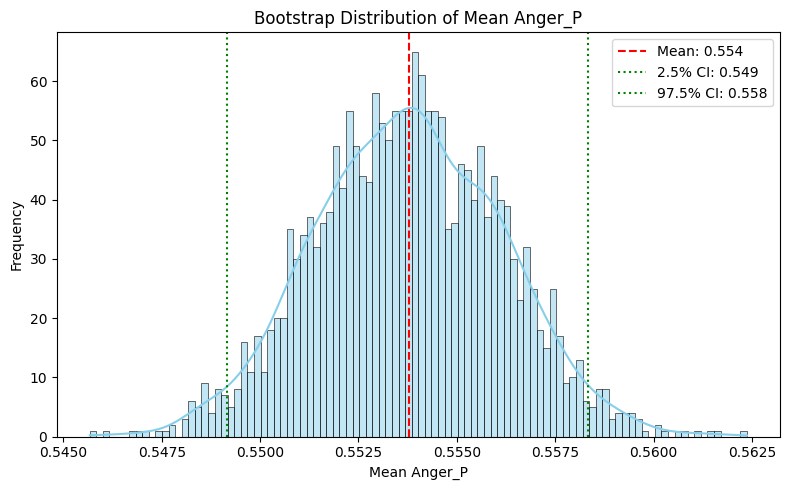

In [45]:
plot_bootstrap_distribution(stat_type="epsilon", criterion="Anger_P", predictor="Anger_A")
plot_bootstrap_distribution(stat_type="k", criterion="Anger_P", predictor="Anger_A")
plot_bootstrap_distribution(stat_type="p", criterion="Anger_P", predictor="Anger_A")
plot_bootstrap_distribution(stat_type="mean", variable="Anger_P", topic="Sport")
plot_bootstrap_distribution(stat_type="mean", variable="Anger_P", topic="Wirtschaft")

Descriptive Statistics

In [46]:
#Choose between Etat, Sport, Wirtschaft, Web, Inland, International, Kultur, Wissenschaft, Panorama
topic = "Kultur"
topic_desc = desc_stats[desc_stats['topic'] == topic]
topic_desc

,variable,topic,mean,mean_ci_lower,mean_ci_upper,std
3,Anger_A,Kultur,0.0669,0.0634,0.0706,0.1452
12,Fear_A,Kultur,0.7009,0.6916,0.7107,0.3880
21,Disgust_A,Kultur,0.0031,0.0026,0.0035,0.0173
30,Sadness_A,Kultur,0.0720,0.0675,0.0766,0.1857
39,Joy_A,Kultur,0.0187,0.0165,0.0210,0.0880
48,None_A,Kultur,0.1384,0.1316,0.1458,0.2779
57,Anger_P,Kultur,0.3530,0.3423,0.3629,0.4113
66,Fear_P,Kultur,0.1252,0.1174,0.1328,0.3156
75,Disgust_P,Kultur,0.0240,0.0208,0.0272,0.1270
84,Sadness_P,Kultur,0.0959,0.0899,0.1021,0.2503
